In [1]:
%cd Emotion-detection

C:\Users\choud\Emotion-detection


In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
cd src

C:\Users\choud\Emotion-detection\src


In [ ]:
! python emotions.py --mode display

In [ ]:
pip install matplotlib

# Import libraries and dataset

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
dataset = pd.read_csv('fer2013.csv')
dataset2 = dataset.copy()
dataset2 = dataset.drop(['Usage'], axis=1)

In [24]:
def convert(col):
    col=np.array(col.split(' ')).reshape(48*48*1,).astype('float32')
    return col

In [25]:
dataset2['pixels']=dataset2['pixels'].apply(convert)

In [26]:
X=np.stack(dataset2['pixels'], axis=0)

In [27]:
y=dataset.iloc[:, 2].values

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into Training and Validation set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)

[[ 38. 112. 188. ...   4.   5.   5.]
 [  3.   1.   8. ...  38.  48.  28.]
 [ 56.  39.  41. ...  60.  56.  37.]
 ...
 [ 60.  61.  64. ...  61.  58.  65.]
 [110. 125. 133. ... 151. 158. 167.]
 [ 27.  30.  33. ... 246.  76.   0.]]


In [30]:
print(y_train)

[2 2 2 ... 1 2 2]


In [31]:
print(X_test)

[[185. 182. 176. ... 227. 234. 241.]
 [103.  50.   3. ...  65.  66.  66.]
 [255. 255. 255. ...  54.  78.  86.]
 ...
 [ 76.  70.  61. ... 104.  69. 128.]
 [104.  52. 125. ...  27.  35.  33.]
 [ 54.  87. 133. ...  17.  22.  39.]]


In [32]:
print(y_test)

[0 2 2 ... 2 2 2]


# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.98812807 -0.05324139  0.940038   ... -1.4021286  -1.3871421
  -1.3879421 ]
 [-1.4136044  -1.4276537  -1.3274219  ... -0.96294326 -0.8362621
  -1.0957726 ]
 [-0.7693116  -0.9571342  -0.9117209  ... -0.6787645  -0.7337728
  -0.98144543]
 ...
 [-0.7206858  -0.6847281  -0.62198985 ... -0.6658473  -0.70815045
  -0.62576085]
 [-0.1128625   0.10772581  0.24720307 ...  0.49670208  0.5729657
   0.66994745]
 [-1.1218492  -1.068573   -1.012497   ...  1.7238376  -0.47754955
  -1.4514573 ]]
[[ 0.79887235  0.81350505  0.78887403 ...  1.4784105   1.5466139
   1.6099712 ]
 [-0.19795774 -0.82093114 -1.3904068  ... -0.6141785  -0.60566115
  -0.6130578 ]
 [ 1.6498251   1.7173978   1.784037   ... -0.75626785 -0.45192724
  -0.35899737]
 ...
 [-0.5261823  -0.5732893  -0.65978086 ... -0.11040704 -0.56722766
   0.17452957]
 [-0.18580128 -0.79616696  0.14642707 ... -1.1050327  -1.0028071
  -1.0322574 ]
 [-0.7936246  -0.36279368  0.24720307 ... -1.2342048  -1.1693523
  -0.95603937]]


# Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Predicting Test Set Results and Confusion Matrix

In [35]:
y_pred = dtree.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape
(len(y_test),1)),1))

[[2 0]
 [2 2]
 [2 2]
 ...
 [1 2]
 [2 2]
 [2 2]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score , f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 108   96  690]
 [ 102  105  672]
 [ 878  857 5464]]


# Accuracy, Precision, Recall and F1 Score

In [40]:
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("Precision Score :",precision_score(y_test, y_pred, average='weighted'))
print("Recall Score :",recall_score(y_test, y_pred, average='weighted'))
print("f1 Score :",f1_score(y_test, y_pred, average='weighted'))

Accuracy Score : 0.6327463218903254
Precision Score : 0.6618984460099779
Recall Score : 0.6327463218903254
f1 Score : 0.646683324474664


# Classification Report and Heat Map

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['training', 'PublicTest', 'PrivateTest']))

              precision    recall  f1-score   support

    training       0.10      0.12      0.11       894
  PublicTest       0.10      0.12      0.11       879
 PrivateTest       0.80      0.76      0.78      7199

    accuracy                           0.63      8972
   macro avg       0.33      0.33      0.33      8972
weighted avg       0.66      0.63      0.65      8972



<AxesSubplot:>

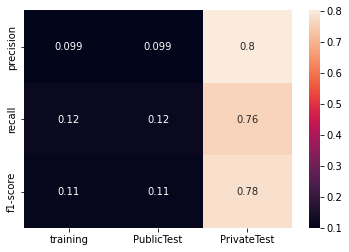

In [42]:
classificationReport=classification_report(y_test, y_pred, target_names=['training', 'PublicTest', 'PrivateTest'], output_dict=True)
cleaned_report={}
cleaned_report['training']=classificationReport['training']
cleaned_report['PublicTest']=classificationReport['PublicTest']
cleaned_report['PrivateTest']=classificationReport['PrivateTest']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:], annot=True)

In [47]:
d=['Decision Tree', accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
df=pd.DataFrame([d], columns=['Algorithm', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
df.set_index('Algorithm', inplace=True)
df

,Accuracy Score,Precision Score,Recall Score,F1 Score
Algorithm,,,,
Decision Tree,0.632746,0.661898,0.632746,0.646683


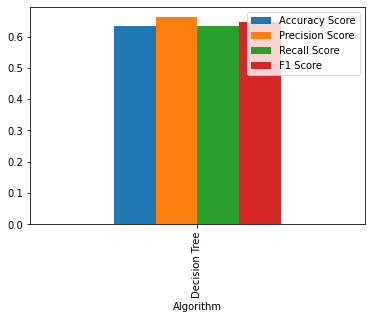

In [48]:
df.plot.bar()
plt.show()